# generate_k_space

In [21]:
import numpy as np
from scipy import linalg

class HubbardHartreeFock:
    def __init__(self, t, U, N):
        """
        Initializes the Hubbard model parameters for Hartree-Fock calculations.

        Parameters:
        - t (float): Hopping parameter.
        - U (float): On-site interaction strength.
        - N (int): Number of k-points in each direction of the 2D lattice.
        """
        self.t = t  # Hopping parameter
        self.U = U  # On-site interaction strength
        self.N = N  # Number of k-points in each direction
        self.k_space = self.generate_k_space()  # Generating the k-space

    def generate_k_space(self):
        """
        Generates the mesh grid of k points in the first Brillouin zone.

        Returns:
        - numpy.ndarray: A 2D array with shape (N^2, 2), where the first column
                         is the kx component and the second column is the ky component.
        """
        # Generating kx and ky values, including -pi but excluding +pi
        k_values = np.linspace(-np.pi, np.pi, self.N, endpoint=False)
        kx, ky = np.meshgrid(k_values, k_values)

        # Reshaping the mesh grid to form a (N^2, 2) array
        k_space = np.vstack([kx.flatten(), ky.flatten()]).T

        return k_space


In [10]:
hb=HubbardHartreeFock(1,1,10)

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


Text(0, 0.5, '$k_y$')

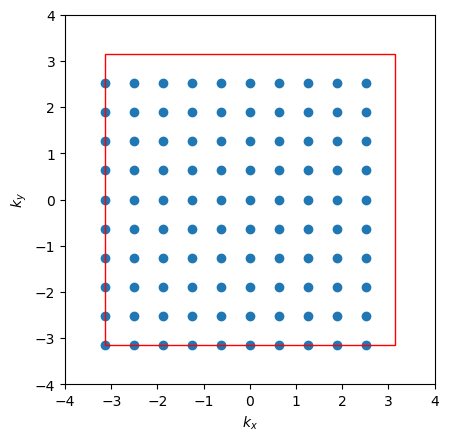

In [20]:
fig,ax=plt.subplots()
ax.scatter(*hb.k_space.T)
ax.set_aspect('equal')

rect = patches.Rectangle((-np.pi, -np.pi), 2*np.pi, 2*np.pi, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')


# generate_noninteracting 

In [22]:
import numpy as np

class HubbardHartreeFock:
    def __init__(self, t, U, N):
        """
        Initializes the Hubbard model parameters for Hartree-Fock calculations.

        Parameters:
        - t (float): Hopping parameter.
        - U (float): On-site interaction strength.
        - N (int): Number of k-points in each direction of the 2D lattice.
        """
        self.t = t  # Hopping parameter
        self.U = U  # On-site interaction strength
        self.N = N  # Number of k-points in each direction
        self.k_space = self.generate_k_space()  # Generating the k-space
        self.H0 = self.generate_noninteracting()  # Generating the noninteracting term

    def generate_k_space(self):
        """
        Generates the mesh grid of k points in the first Brillouin zone.

        Returns:
        - numpy.ndarray: A 2D array with shape (N^2, 2), where the first column
                         is the kx component and the second column is the ky component.
        """
        k_values = np.linspace(-np.pi, np.pi, self.N, endpoint=False)
        kx, ky = np.meshgrid(k_values, k_values)
        k_space = np.vstack([kx.flatten(), ky.flatten()]).T
        return k_space

    def generate_noninteracting(self):
        """
        Constructs the noninteracting term for the Hamiltonian.

        Returns:
        - numpy.ndarray: A 3D array with shape (2, 2, N^2), where the first two axes
                         represent the spin components, and the third axis represents
                         different k points.
        """
        # Initializing the array
        noninteracting_matrix = np.zeros((2, 2, self.N**2))

        # Calculating epsilon_k for each k point
        epsilon_k = -2 * self.t * (np.cos(self.k_space[:, 0]) + np.cos(self.k_space[:, 1]))

        # Filling in the diagonal for both spin up and down
        noninteracting_matrix[0, 0, :] = epsilon_k  # Spin up diagonal
        noninteracting_matrix[1, 1, :] = epsilon_k  # Spin down diagonal

        return noninteracting_matrix


In [30]:
hb=HubbardHartreeFock(1,1,100)
ek=hb.generate_noninteracting()

Text(0, 0.5, '$k_y$')

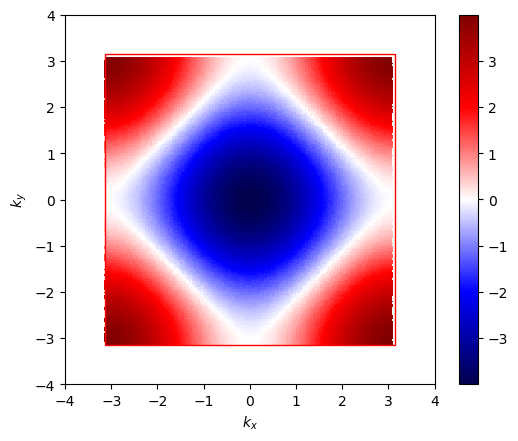

In [36]:
fig,ax=plt.subplots()
im=ax.tripcolor(hb.k_space[:,0],hb.k_space[:,1],ek[0,0,:],cmap='seismic')

plt.colorbar(im)

ax.set_aspect('equal')

rect = patches.Rectangle((-np.pi, -np.pi), 2*np.pi, 2*np.pi, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')


In [ ]:
generate_noninteracting

# generate_H_int  

In [61]:
import numpy as np

class HubbardHartreeFock:
    def __init__(self, t, U, N):
        """
        Initializes the Hubbard model parameters for Hartree-Fock calculations.

        Parameters:
        - t (float): Hopping parameter.
        - U (float): On-site interaction strength.
        - N (int): Number of k-points in each direction of the 2D lattice.
        """
        self.t = t  # Hopping parameter
        self.U = U  # On-site interaction strength
        self.N = N  # Number of k-points in each direction
        self.k_space = self.generate_k_space()  # Generating the k-space
        self.H0 = self.generate_noninteracting()
        # Placeholder for H0 initialization
        # Placeholder for exp_val initialization

    def generate_k_space(self):
        """
        Generates the mesh grid of k points in the first Brillouin zone.

        Returns:
        - numpy.ndarray: A 2D array with shape (N^2, 2), where the first column
                         is the kx component and the second column is the ky component.
        """
        k_values = np.linspace(-np.pi, np.pi, self.N, endpoint=False)
        kx, ky = np.meshgrid(k_values, k_values)
        k_space = np.vstack([kx.flatten(), ky.flatten()]).T
        return k_space

    def generate_noninteracting(self):
        """
        Constructs the noninteracting term for the Hamiltonian.

        Returns:
        - numpy.ndarray: A 3D array with shape (2, 2, N^2), where the first two axes
                         represent the spin components, and the third axis represents
                         different k points.
        """
        # Initializing the array
        noninteracting_matrix = np.zeros((2, 2, self.N**2))

        # Calculating epsilon_k for each k point
        epsilon_k = -2 * self.t * (np.cos(self.k_space[:, 0]) + np.cos(self.k_space[:, 1]))

        # Filling in the diagonal for both spin up and down
        noninteracting_matrix[0, 0, :] = epsilon_k  # Spin up diagonal
        noninteracting_matrix[1, 1, :] = epsilon_k  # Spin down diagonal

        return noninteracting_matrix

    def generate_H_int(self, exp_val):
        """
        Constructs the interacting term after Hartree-Fock decomposition.

        Parameters:
        - exp_val (numpy.ndarray): Expected values with shape (2, N^2), where the first index
                                   represents spin up and down, and the second index represents
                                   different k points.

        Returns:
        - numpy.ndarray: A 3D array with shape (2, 2, N^2), representing the interacting term.
        """
        # Initializing the interacting term matrix
        H_int_matrix = np.zeros((2, 2, self.N**2))
        
        # Calculating the interacting term for both spin components
        # Note: The sum over k' is accounted for by averaging the expectation values (exp_val)
        avg_exp_val_up = np.mean(exp_val[0, :])  # Average for spin up
        avg_exp_val_down = np.mean(exp_val[1, :])  # Average for spin down
        
        # Filling the diagonal terms according to the Hartree-Fock approximation
        H_int_matrix[0, 0, :] = self.U * avg_exp_val_down  # For spin up electrons
        H_int_matrix[1, 1, :] = self.U * avg_exp_val_up  # For spin down electrons

        return H_int_matrix


In [62]:
hb=HubbardHartreeFock(1,1,100)
ek=hb.generate_noninteracting()
exp_val=np.vstack([np.ones(hb.N**2),np.zeros(hb.N**2)]).T
h_int=hb.generate_H_int(exp_val)
h_total=ek+h_int

Text(0, 0.5, '$k_y$')

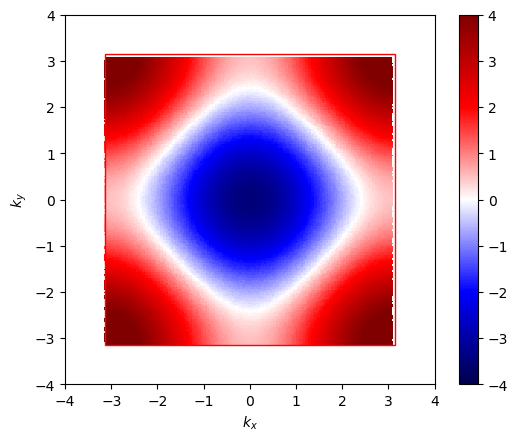

In [64]:
fig,ax=plt.subplots()
im=ax.tripcolor(hb.k_space[:,0],hb.k_space[:,1],h_total[0,0,:],cmap='seismic',vmin=-4,vmax=4)
# im=ax.tripcolor(hb.k_space[:,0],hb.k_space[:,1],h_total[1,1,:],cmap='seismic',vmin=-3,vmax=5)

plt.colorbar(im)

ax.set_aspect('equal')

rect = patches.Rectangle((-np.pi, -np.pi), 2*np.pi, 2*np.pi, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')


# get_occupancy

In [133]:
import numpy as np

class HubbardHartreeFock:
    def __init__(self, t, U, N):
        """
        Initializes the Hubbard model parameters for Hartree-Fock calculations.

        Parameters:
        - t (float): Hopping parameter.
        - U (float): On-site interaction strength.
        - N (int): Number of k-points in each direction of the 2D lattice.
        """
        self.t = t  # Hopping parameter
        self.U = U  # On-site interaction strength
        self.N = N  # Number of k-points in each direction
        self.k_space = self.generate_k_space()  # Generating the k-space
        self.H0 = self.generate_noninteracting()
        # Placeholder for H0 initialization
        # Placeholder for exp_val initialization

    def generate_k_space(self):
        """
        Generates the mesh grid of k points in the first Brillouin zone.

        Returns:
        - numpy.ndarray: A 2D array with shape (N^2, 2), where the first column
                         is the kx component and the second column is the ky component.
        """
        k_values = np.linspace(-np.pi, np.pi, self.N, endpoint=False)
        kx, ky = np.meshgrid(k_values, k_values)
        k_space = np.vstack([kx.flatten(), ky.flatten()]).T
        return k_space

    def generate_noninteracting(self):
        """
        Constructs the noninteracting term for the Hamiltonian.

        Returns:
        - numpy.ndarray: A 3D array with shape (2, 2, N^2), where the first two axes
                         represent the spin components, and the third axis represents
                         different k points.
        """
        # Initializing the array
        noninteracting_matrix = np.zeros((2, 2, self.N**2))

        # Calculating epsilon_k for each k point
        epsilon_k = -2 * self.t * (np.cos(self.k_space[:, 0]) + np.cos(self.k_space[:, 1]))

        # Filling in the diagonal for both spin up and down
        noninteracting_matrix[0, 0, :] = epsilon_k  # Spin up diagonal
        noninteracting_matrix[1, 1, :] = epsilon_k  # Spin down diagonal

        return noninteracting_matrix

    def generate_H_int(self, exp_val):
        """
        Constructs the interacting term after Hartree-Fock decomposition.

        Parameters:
        - exp_val (numpy.ndarray): Expected values with shape (2, N^2), where the first index
                                   represents spin up and down, and the second index represents
                                   different k points.

        Returns:
        - numpy.ndarray: A 3D array with shape (2, 2, N^2), representing the interacting term.
        """
        # Initializing the interacting term matrix
        H_int_matrix = np.zeros((2, 2, self.N**2))
        
        # Calculating the interacting term for both spin components
        # Note: The sum over k' is accounted for by averaging the expectation values (exp_val)
        avg_exp_val_up = np.mean(exp_val[0, :])  # Average for spin up
        avg_exp_val_down = np.mean(exp_val[1, :])  # Average for spin down
        
        # Filling the diagonal terms according to the Hartree-Fock approximation
        H_int_matrix[0, 0, :] = self.U * avg_exp_val_down  # For spin up electrons
        H_int_matrix[1, 1, :] = self.U * avg_exp_val_up  # For spin down electrons

        return H_int_matrix

    def get_occupancy(self, en, nu):
        """
        Calculates the occupancy of each state at each k point.

        Parameters:
        - en (numpy.ndarray): The energies with shape (2, N^2), where the first index is the level index
                              (spin up and spin down), and the second index is for different k points.
        - nu (float): The filling factor, determining the proportion of occupied states.

        Returns:
        - numpy.ndarray: The occupancy with shape (2, N^2), where the first index is the level index
                         (spin up and spin down), and the second index is for different k points.
        """
        # Flatten the energy array to find the universal Fermi level
        flattened_en = en.flatten()

        # Sort the flattened energy array to find the Fermi level based on filling factor
        sorted_en = np.sort(flattened_en)
        
        # Determine the index for the Fermi level based on the filling factor
        fermi_index = int(np.floor(nu * len(sorted_en)))
        
        # Fermi energy is the energy at the Fermi index
        fermi_energy = sorted_en[fermi_index]

        # Compute occupancy: 1 if energy <= Fermi level, 0 otherwise
        occupancy = np.where(en <= fermi_energy, 1, 0)

        return occupancy

In [158]:
hb=HubbardHartreeFock(1,1,100)
ek=hb.generate_noninteracting()

en=np.vstack([ek[0,0,:],ek[1,1,:]+1])
occupancy=hb.get_occupancy(en,0.5)

# wf=np.repeat(np.array([[1,0.1],[0.2,1]])[:,:,np.newaxis],hb.N**2,axis=-1)
# h_int=hb.generate_H_int(exp_val)

# # h_total=ek+h_int

Text(0, 0.5, '$k_y$')

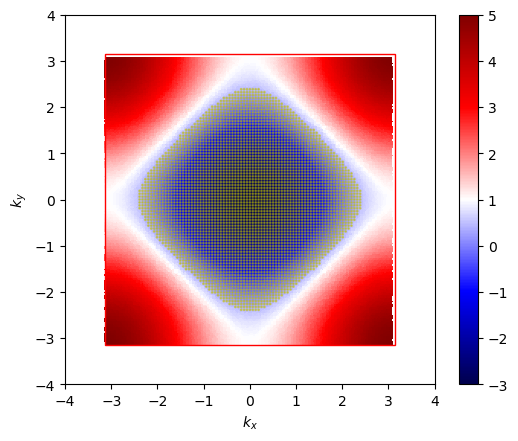

In [162]:
fig,ax=plt.subplots()
# im=ax.tripcolor(hb.k_space[:,0],hb.k_space[:,1],en[0,:],cmap='seismic',vmin=-4,vmax=4)
# ax.scatter(hb.k_space[:,0],hb.k_space[:,1],occupancy[0,:],color='y',alpha=0.5)

im=ax.tripcolor(hb.k_space[:,0],hb.k_space[:,1],en[1,:],cmap='seismic',vmin=-3,vmax=5)
ax.scatter(hb.k_space[:,0],hb.k_space[:,1],occupancy[1,:],color='y',alpha=0.5)

plt.colorbar(im)

ax.set_aspect('equal')

rect = patches.Rectangle((-np.pi, -np.pi), 2*np.pi, 2*np.pi, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')


In [137]:
occupancy

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]])

# compute_exp_val

In [163]:
import numpy as np

class HubbardHartreeFock:
    def __init__(self, t, U, N):
        """
        Initializes the Hubbard model parameters for Hartree-Fock calculations.

        Parameters:
        - t (float): Hopping parameter.
        - U (float): On-site interaction strength.
        - N (int): Number of k-points in each direction of the 2D lattice.
        """
        self.t = t  # Hopping parameter
        self.U = U  # On-site interaction strength
        self.N = N  # Number of k-points in each direction
        self.k_space = self.generate_k_space()  # Generating the k-space
        self.H0 = self.generate_noninteracting()
        # Placeholder for H0 initialization
        # Placeholder for exp_val initialization

    def generate_k_space(self):
        """
        Generates the mesh grid of k points in the first Brillouin zone.

        Returns:
        - numpy.ndarray: A 2D array with shape (N^2, 2), where the first column
                         is the kx component and the second column is the ky component.
        """
        k_values = np.linspace(-np.pi, np.pi, self.N, endpoint=False)
        kx, ky = np.meshgrid(k_values, k_values)
        k_space = np.vstack([kx.flatten(), ky.flatten()]).T
        return k_space

    def generate_noninteracting(self):
        """
        Constructs the noninteracting term for the Hamiltonian.

        Returns:
        - numpy.ndarray: A 3D array with shape (2, 2, N^2), where the first two axes
                         represent the spin components, and the third axis represents
                         different k points.
        """
        # Initializing the array
        noninteracting_matrix = np.zeros((2, 2, self.N**2))

        # Calculating epsilon_k for each k point
        epsilon_k = -2 * self.t * (np.cos(self.k_space[:, 0]) + np.cos(self.k_space[:, 1]))

        # Filling in the diagonal for both spin up and down
        noninteracting_matrix[0, 0, :] = epsilon_k  # Spin up diagonal
        noninteracting_matrix[1, 1, :] = epsilon_k  # Spin down diagonal

        return noninteracting_matrix

    def generate_H_int(self, exp_val):
        """
        Constructs the interacting term after Hartree-Fock decomposition.

        Parameters:
        - exp_val (numpy.ndarray): Expected values with shape (2, N^2), where the first index
                                   represents spin up and down, and the second index represents
                                   different k points.

        Returns:
        - numpy.ndarray: A 3D array with shape (2, 2, N^2), representing the interacting term.
        """
        # Initializing the interacting term matrix
        H_int_matrix = np.zeros((2, 2, self.N**2))
        
        # Calculating the interacting term for both spin components
        # Note: The sum over k' is accounted for by averaging the expectation values (exp_val)
        avg_exp_val_up = np.mean(exp_val[0, :])  # Average for spin up
        avg_exp_val_down = np.mean(exp_val[1, :])  # Average for spin down
        
        # Filling the diagonal terms according to the Hartree-Fock approximation
        H_int_matrix[0, 0, :] = self.U * avg_exp_val_down  # For spin up electrons
        H_int_matrix[1, 1, :] = self.U * avg_exp_val_up  # For spin down electrons

        return H_int_matrix

    def get_occupancy(self, en, nu):
        """
        Calculates the occupancy of each state at each k point.

        Parameters:
        - en (numpy.ndarray): The energies with shape (2, N^2), where the first index is the level index
                              (spin up and spin down), and the second index is for different k points.
        - nu (float): The filling factor, determining the proportion of occupied states.

        Returns:
        - numpy.ndarray: The occupancy with shape (2, N^2), where the first index is the level index
                         (spin up and spin down), and the second index is for different k points.
        """
        # Flatten the energy array to find the universal Fermi level
        flattened_en = en.flatten()

        # Sort the flattened energy array to find the Fermi level based on filling factor
        sorted_en = np.sort(flattened_en)
        
        # Determine the index for the Fermi level based on the filling factor
        fermi_index = int(np.floor(nu * len(sorted_en)))
        
        # Fermi energy is the energy at the Fermi index
        fermi_energy = sorted_en[fermi_index]

        # Compute occupancy: 1 if energy <= Fermi level, 0 otherwise
        occupancy = np.where(en <= fermi_energy, 1, 0)

        return occupancy

    def compute_exp_val(self, wf, occupancy):
        """
        Computes the expected value <c_k,s^dagger c_k,s> using the wavefunction and occupancy.

        Parameters:
        - wf (numpy.ndarray): Wavefunction with shape (2, 2, N^2), where the first index is for spin (up/down),
                              the second index is the level index, and the third index is for different k points.
        - occupancy (numpy.ndarray): Occupancy of each state at each k point, with shape (2, N^2),
                                     where the first index is the level index, and the second index is for different k points.

        Returns:
        - numpy.ndarray: The expected value with shape (2, N^2), where the first index is for spin (up/down),
                         and the second index is for different k points.
        """
        # Compute the expected value using tensor contraction with np.einsum
        exp_val = np.einsum('slk,lk,slk->sk', wf, occupancy, np.conj(wf))
        return exp_val



In [176]:
hb=HubbardHartreeFock(1,1,100)
ek=hb.generate_noninteracting()
en=np.vstack([ek[0,0,:],ek[1,1,:]+1])
occupancy=hb.get_occupancy(en,0.5)
wf=np.repeat(np.array([[1,0.],[0.,1]])[:,:,np.newaxis],hb.N**2,axis=-1)
exp_val=hb.compute_exp_val(wf,occupancy)


Text(0, 0.5, '$k_y$')

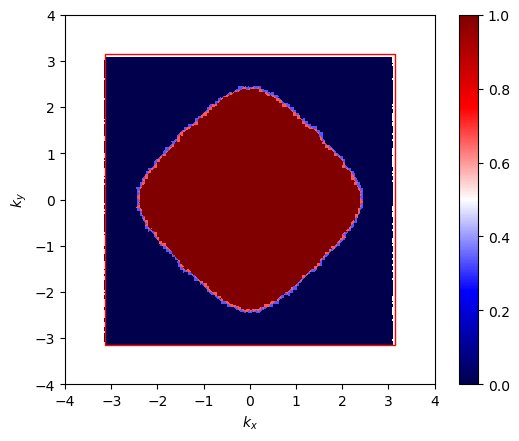

In [179]:
fig,ax=plt.subplots()
im=ax.tripcolor(hb.k_space[:,0],hb.k_space[:,1],exp_val[1,:],cmap='seismic',)
# ax.scatter(hb.k_space[:,0],hb.k_space[:,1],occupancy[0,:],color='y',alpha=0.5)

# im=ax.tripcolor(hb.k_space[:,0],hb.k_space[:,1],en[1,:],cmap='seismic',vmin=-3,vmax=5)
# ax.scatter(hb.k_space[:,0],hb.k_space[:,1],occupancy[1,:],color='y',alpha=0.5)

plt.colorbar(im)

ax.set_aspect('equal')

rect = patches.Rectangle((-np.pi, -np.pi), 2*np.pi, 2*np.pi, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')


# generate_total

In [181]:
import numpy as np

class HubbardHartreeFock:
    def __init__(self, t, U, N):
        """
        Initializes the Hubbard model parameters for Hartree-Fock calculations.

        Parameters:
        - t (float): Hopping parameter.
        - U (float): On-site interaction strength.
        - N (int): Number of k-points in each direction of the 2D lattice.
        """
        self.t = t  # Hopping parameter
        self.U = U  # On-site interaction strength
        self.N = N  # Number of k-points in each direction
        self.k_space = self.generate_k_space()  # Generating the k-space
        self.H0 = self.generate_noninteracting()
        # Placeholder for H0 initialization
        # Placeholder for exp_val initialization

    def generate_k_space(self):
        """
        Generates the mesh grid of k points in the first Brillouin zone.

        Returns:
        - numpy.ndarray: A 2D array with shape (N^2, 2), where the first column
                         is the kx component and the second column is the ky component.
        """
        k_values = np.linspace(-np.pi, np.pi, self.N, endpoint=False)
        kx, ky = np.meshgrid(k_values, k_values)
        k_space = np.vstack([kx.flatten(), ky.flatten()]).T
        return k_space

    def generate_noninteracting(self):
        """
        Constructs the noninteracting term for the Hamiltonian.

        Returns:
        - numpy.ndarray: A 3D array with shape (2, 2, N^2), where the first two axes
                         represent the spin components, and the third axis represents
                         different k points.
        """
        # Initializing the array
        noninteracting_matrix = np.zeros((2, 2, self.N**2))

        # Calculating epsilon_k for each k point
        epsilon_k = -2 * self.t * (np.cos(self.k_space[:, 0]) + np.cos(self.k_space[:, 1]))

        # Filling in the diagonal for both spin up and down
        noninteracting_matrix[0, 0, :] = epsilon_k  # Spin up diagonal
        noninteracting_matrix[1, 1, :] = epsilon_k  # Spin down diagonal

        return noninteracting_matrix

    def generate_H_int(self, exp_val):
        """
        Constructs the interacting term after Hartree-Fock decomposition.

        Parameters:
        - exp_val (numpy.ndarray): Expected values with shape (2, N^2), where the first index
                                   represents spin up and down, and the second index represents
                                   different k points.

        Returns:
        - numpy.ndarray: A 3D array with shape (2, 2, N^2), representing the interacting term.
        """
        # Initializing the interacting term matrix
        H_int_matrix = np.zeros((2, 2, self.N**2))
        
        # Calculating the interacting term for both spin components
        # Note: The sum over k' is accounted for by averaging the expectation values (exp_val)
        avg_exp_val_up = np.mean(exp_val[0, :])  # Average for spin up
        avg_exp_val_down = np.mean(exp_val[1, :])  # Average for spin down
        
        # Filling the diagonal terms according to the Hartree-Fock approximation
        H_int_matrix[0, 0, :] = self.U * avg_exp_val_down  # For spin up electrons
        H_int_matrix[1, 1, :] = self.U * avg_exp_val_up  # For spin down electrons

        return H_int_matrix

    def get_occupancy(self, en, nu):
        """
        Calculates the occupancy of each state at each k point.

        Parameters:
        - en (numpy.ndarray): The energies with shape (2, N^2), where the first index is the level index
                              (spin up and spin down), and the second index is for different k points.
        - nu (float): The filling factor, determining the proportion of occupied states.

        Returns:
        - numpy.ndarray: The occupancy with shape (2, N^2), where the first index is the level index
                         (spin up and spin down), and the second index is for different k points.
        """
        # Flatten the energy array to find the universal Fermi level
        flattened_en = en.flatten()

        # Sort the flattened energy array to find the Fermi level based on filling factor
        sorted_en = np.sort(flattened_en)
        
        # Determine the index for the Fermi level based on the filling factor
        fermi_index = int(np.floor(nu * len(sorted_en)))
        
        # Fermi energy is the energy at the Fermi index
        fermi_energy = sorted_en[fermi_index]

        # Compute occupancy: 1 if energy <= Fermi level, 0 otherwise
        occupancy = np.where(en <= fermi_energy, 1, 0)

        return occupancy

    def compute_exp_val(self, wf, occupancy):
        """
        Computes the expected value <c_k,s^dagger c_k,s> using the wavefunction and occupancy.

        Parameters:
        - wf (numpy.ndarray): Wavefunction with shape (2, 2, N^2), where the first index is for spin (up/down),
                              the second index is the level index, and the third index is for different k points.
        - occupancy (numpy.ndarray): Occupancy of each state at each k point, with shape (2, N^2),
                                     where the first index is the level index, and the second index is for different k points.

        Returns:
        - numpy.ndarray: The expected value with shape (2, N^2), where the first index is for spin (up/down),
                         and the second index is for different k points.
        """
        # Compute the expected value using tensor contraction with np.einsum
        exp_val = np.einsum('slk,lk,slk->sk', wf, occupancy, np.conj(wf))
        return exp_val



    def generate_total(self, H_int):
        """
        Computes the total Hamiltonian as the sum of the noninteracting and interacting terms.

        Parameters:
        - H_int (numpy.ndarray): The interacting term with shape (2, 2, N^2), where the first two indices
                                 are for spin up and spin down, and the third axis is for different k points.

        Returns:
        - numpy.ndarray: The total Hamiltonian with the same shape (2, 2, N^2).
        """
        # Summing the noninteracting term H0 and the interacting term H_int
        H_total = self.H0 + H_int
        return H_total


In [182]:
hb=HubbardHartreeFock(1,1,100)
ek=hb.generate_noninteracting()
en=np.vstack([ek[0,0,:],ek[1,1,:]+1])
occupancy=hb.get_occupancy(en,0.5)
wf=np.repeat(np.array([[1,0.],[0.,1]])[:,:,np.newaxis],hb.N**2,axis=-1)
exp_val=hb.compute_exp_val(wf,occupancy)
H_int=hb.generate_H_int(exp_val)
H_total=hb.generate_H_int(H_int)

# diagonalize

In [207]:
import numpy as np

class HubbardHartreeFock:
    def __init__(self, t, U, N):
        """
        Initializes the Hubbard model parameters for Hartree-Fock calculations.

        Parameters:
        - t (float): Hopping parameter.
        - U (float): On-site interaction strength.
        - N (int): Number of k-points in each direction of the 2D lattice.
        """
        self.t = t  # Hopping parameter
        self.U = U  # On-site interaction strength
        self.N = N  # Number of k-points in each direction
        self.k_space = self.generate_k_space()  # Generating the k-space
        self.H0 = self.generate_noninteracting()
        # Placeholder for H0 initialization
        # Placeholder for exp_val initialization

    def generate_k_space(self):
        """
        Generates the mesh grid of k points in the first Brillouin zone.

        Returns:
        - numpy.ndarray: A 2D array with shape (N^2, 2), where the first column
                         is the kx component and the second column is the ky component.
        """
        k_values = np.linspace(-np.pi, np.pi, self.N, endpoint=False)
        kx, ky = np.meshgrid(k_values, k_values)
        k_space = np.vstack([kx.flatten(), ky.flatten()]).T
        return k_space

    def generate_noninteracting(self):
        """
        Constructs the noninteracting term for the Hamiltonian.

        Returns:
        - numpy.ndarray: A 3D array with shape (2, 2, N^2), where the first two axes
                         represent the spin components, and the third axis represents
                         different k points.
        """
        # Initializing the array
        noninteracting_matrix = np.zeros((2, 2, self.N**2))

        # Calculating epsilon_k for each k point
        epsilon_k = -2 * self.t * (np.cos(self.k_space[:, 0]) + np.cos(self.k_space[:, 1]))

        # Filling in the diagonal for both spin up and down
        noninteracting_matrix[0, 0, :] = epsilon_k  # Spin up diagonal
        noninteracting_matrix[1, 1, :] = epsilon_k  # Spin down diagonal

        return noninteracting_matrix

    def generate_H_int(self, exp_val):
        """
        Constructs the interacting term after Hartree-Fock decomposition.

        Parameters:
        - exp_val (numpy.ndarray): Expected values with shape (2, N^2), where the first index
                                   represents spin up and down, and the second index represents
                                   different k points.

        Returns:
        - numpy.ndarray: A 3D array with shape (2, 2, N^2), representing the interacting term.
        """
        # Initializing the interacting term matrix
        H_int_matrix = np.zeros((2, 2, self.N**2))
        
        # Calculating the interacting term for both spin components
        # Note: The sum over k' is accounted for by averaging the expectation values (exp_val)
        avg_exp_val_up = np.mean(exp_val[0, :])  # Average for spin up
        avg_exp_val_down = np.mean(exp_val[1, :])  # Average for spin down
        
        # Filling the diagonal terms according to the Hartree-Fock approximation
        H_int_matrix[0, 0, :] = self.U * avg_exp_val_down  # For spin up electrons
        H_int_matrix[1, 1, :] = self.U * avg_exp_val_up  # For spin down electrons

        return H_int_matrix

    def get_occupancy(self, en, nu):
        """
        Calculates the occupancy of each state at each k point.

        Parameters:
        - en (numpy.ndarray): The energies with shape (2, N^2), where the first index is the level index
                              (spin up and spin down), and the second index is for different k points.
        - nu (float): The filling factor, determining the proportion of occupied states.

        Returns:
        - numpy.ndarray: The occupancy with shape (2, N^2), where the first index is the level index
                         (spin up and spin down), and the second index is for different k points.
        """
        # Flatten the energy array to find the universal Fermi level
        flattened_en = en.flatten()

        # Sort the flattened energy array to find the Fermi level based on filling factor
        sorted_en = np.sort(flattened_en)
        
        # Determine the index for the Fermi level based on the filling factor
        fermi_index = int(np.floor(nu * len(sorted_en)))
        
        # Fermi energy is the energy at the Fermi index
        fermi_energy = sorted_en[fermi_index]

        # Compute occupancy: 1 if energy <= Fermi level, 0 otherwise
        occupancy = np.where(en <= fermi_energy, 1, 0)

        return occupancy

    def compute_exp_val(self, wf, occupancy):
        """
        Computes the expected value <c_k,s^dagger c_k,s> using the wavefunction and occupancy.

        Parameters:
        - wf (numpy.ndarray): Wavefunction with shape (2, 2, N^2), where the first index is for spin (up/down),
                              the second index is the level index, and the third index is for different k points.
        - occupancy (numpy.ndarray): Occupancy of each state at each k point, with shape (2, N^2),
                                     where the first index is the level index, and the second index is for different k points.

        Returns:
        - numpy.ndarray: The expected value with shape (2, N^2), where the first index is for spin (up/down),
                         and the second index is for different k points.
        """
        # Compute the expected value using tensor contraction with np.einsum
        exp_val = np.einsum('slk,lk,slk->sk', wf, occupancy, np.conj(wf))
        return exp_val



    def generate_total(self, H_int):
        """
        Computes the total Hamiltonian as the sum of the noninteracting and interacting terms.

        Parameters:
        - H_int (numpy.ndarray): The interacting term with shape (2, 2, N^2), where the first two indices
                                 are for spin up and spin down, and the third axis is for different k points.

        Returns:
        - numpy.ndarray: The total Hamiltonian with the same shape (2, 2, N^2).
        """
        # Summing the noninteracting term H0 and the interacting term H_int
        H_total = self.H0 + H_int
        return H_total

    def diagonalize(self, H_total):
        """
        Diagonalizes the total Hamiltonian for each k point, sorts the eigenvalues and eigenvectors.

        Parameters:
        - H_total (numpy.ndarray): The total Hamiltonian with shape (2, 2, N^2).

        Returns:
        - numpy.ndarray: Eigenvectors (wavefunctions) with shape (2, 2, N^2).
        - numpy.ndarray: Eigenvalues (energies) with shape (2, N^2).
        """
        N2 = self.N**2
        wf = np.zeros((2, 2, N2), dtype=np.complex128)  # Wavefunctions (eigenvectors)
        en = np.zeros((2, N2))  # Eigenvalues (energies)

        # Ensure H_total is Hermitian by symmetrizing it
        H_total_sym = (H_total + np.conjugate(np.swapaxes(H_total, 0, 1))) / 2

        # Loop over each k point
        for i in range(N2):
            # Diagonalize the 2x2 Hamiltonian for this k point
            vals, vecs = np.linalg.eigh(H_total_sym[:, :, i])

            # Sort eigenvalues and eigenvectors
            sort_index = np.argsort(vals)
            vals_sorted = vals[sort_index]
            vecs_sorted = vecs[:, sort_index]

            # Store the sorted eigenvalues and eigenvectors
            en[:, i] = vals_sorted
            wf[:, :, i] = vecs_sorted

        return wf, en


In [208]:
hb=HubbardHartreeFock(1,1,100)
ek=hb.generate_noninteracting()
en=np.vstack([ek[0,0,:],ek[1,1,:]+1])
occupancy=hb.get_occupancy(en,0.5)
wf=np.repeat(np.array([[1,0.],[0.,1]])[:,:,np.newaxis],hb.N**2,axis=-1)
exp_val=hb.compute_exp_val(wf,occupancy)
H_int=hb.generate_H_int(exp_val)
H_total=hb.generate_total(H_int)
wf,en=hb.diagonalize(H_total)

In [201]:
hb.H0[:,:,0]

array([[4., 0.],
       [0., 4.]])

In [203]:
H_int[:,:,0]

array([[0.3861, 0.    ],
       [0.    , 0.6141]])

In [198]:
H_total[:,:,0]

array([[4.3861, 0.    ],
       [0.    , 4.6141]])

In [199]:
en[:,0]

array([4.3861, 4.6141])

In [200]:
wf[:,:,0]

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

# get_energy

In [211]:
import numpy as np

class HubbardHartreeFock:
    def __init__(self, t, U, N):
        """
        Initializes the Hubbard model parameters for Hartree-Fock calculations.

        Parameters:
        - t (float): Hopping parameter.
        - U (float): On-site interaction strength.
        - N (int): Number of k-points in each direction of the 2D lattice.
        """
        self.t = t  # Hopping parameter
        self.U = U  # On-site interaction strength
        self.N = N  # Number of k-points in each direction
        self.k_space = self.generate_k_space()  # Generating the k-space
        self.H0 = self.generate_noninteracting()
        # Placeholder for H0 initialization
        # Placeholder for exp_val initialization

    def generate_k_space(self):
        """
        Generates the mesh grid of k points in the first Brillouin zone.

        Returns:
        - numpy.ndarray: A 2D array with shape (N^2, 2), where the first column
                         is the kx component and the second column is the ky component.
        """
        k_values = np.linspace(-np.pi, np.pi, self.N, endpoint=False)
        kx, ky = np.meshgrid(k_values, k_values)
        k_space = np.vstack([kx.flatten(), ky.flatten()]).T
        return k_space

    def generate_noninteracting(self):
        """
        Constructs the noninteracting term for the Hamiltonian.

        Returns:
        - numpy.ndarray: A 3D array with shape (2, 2, N^2), where the first two axes
                         represent the spin components, and the third axis represents
                         different k points.
        """
        # Initializing the array
        noninteracting_matrix = np.zeros((2, 2, self.N**2))

        # Calculating epsilon_k for each k point
        epsilon_k = -2 * self.t * (np.cos(self.k_space[:, 0]) + np.cos(self.k_space[:, 1]))

        # Filling in the diagonal for both spin up and down
        noninteracting_matrix[0, 0, :] = epsilon_k  # Spin up diagonal
        noninteracting_matrix[1, 1, :] = epsilon_k  # Spin down diagonal

        return noninteracting_matrix

    def generate_H_int(self, exp_val):
        """
        Constructs the interacting term after Hartree-Fock decomposition.

        Parameters:
        - exp_val (numpy.ndarray): Expected values with shape (2, N^2), where the first index
                                   represents spin up and down, and the second index represents
                                   different k points.

        Returns:
        - numpy.ndarray: A 3D array with shape (2, 2, N^2), representing the interacting term.
        """
        # Initializing the interacting term matrix
        H_int_matrix = np.zeros((2, 2, self.N**2))
        
        # Calculating the interacting term for both spin components
        # Note: The sum over k' is accounted for by averaging the expectation values (exp_val)
        avg_exp_val_up = np.mean(exp_val[0, :])  # Average for spin up
        avg_exp_val_down = np.mean(exp_val[1, :])  # Average for spin down
        
        # Filling the diagonal terms according to the Hartree-Fock approximation
        H_int_matrix[0, 0, :] = self.U * avg_exp_val_down  # For spin up electrons
        H_int_matrix[1, 1, :] = self.U * avg_exp_val_up  # For spin down electrons

        return H_int_matrix

    def get_occupancy(self, en, nu):
        """
        Calculates the occupancy of each state at each k point.

        Parameters:
        - en (numpy.ndarray): The energies with shape (2, N^2), where the first index is the level index
                              (spin up and spin down), and the second index is for different k points.
        - nu (float): The filling factor, determining the proportion of occupied states.

        Returns:
        - numpy.ndarray: The occupancy with shape (2, N^2), where the first index is the level index
                         (spin up and spin down), and the second index is for different k points.
        """
        # Flatten the energy array to find the universal Fermi level
        flattened_en = en.flatten()

        # Sort the flattened energy array to find the Fermi level based on filling factor
        sorted_en = np.sort(flattened_en)
        
        # Determine the index for the Fermi level based on the filling factor
        fermi_index = int(np.floor(nu * len(sorted_en)))
        
        # Fermi energy is the energy at the Fermi index
        fermi_energy = sorted_en[fermi_index]

        # Compute occupancy: 1 if energy <= Fermi level, 0 otherwise
        occupancy = np.where(en <= fermi_energy, 1, 0)

        return occupancy

    def compute_exp_val(self, wf, occupancy):
        """
        Computes the expected value <c_k,s^dagger c_k,s> using the wavefunction and occupancy.

        Parameters:
        - wf (numpy.ndarray): Wavefunction with shape (2, 2, N^2), where the first index is for spin (up/down),
                              the second index is the level index, and the third index is for different k points.
        - occupancy (numpy.ndarray): Occupancy of each state at each k point, with shape (2, N^2),
                                     where the first index is the level index, and the second index is for different k points.

        Returns:
        - numpy.ndarray: The expected value with shape (2, N^2), where the first index is for spin (up/down),
                         and the second index is for different k points.
        """
        # Compute the expected value using tensor contraction with np.einsum
        exp_val = np.einsum('slk,lk,slk->sk', wf, occupancy, np.conj(wf))
        return exp_val



    def generate_total(self, H_int):
        """
        Computes the total Hamiltonian as the sum of the noninteracting and interacting terms.

        Parameters:
        - H_int (numpy.ndarray): The interacting term with shape (2, 2, N^2), where the first two indices
                                 are for spin up and spin down, and the third axis is for different k points.

        Returns:
        - numpy.ndarray: The total Hamiltonian with the same shape (2, 2, N^2).
        """
        # Summing the noninteracting term H0 and the interacting term H_int
        H_total = self.H0 + H_int
        return H_total

    def diagonalize(self, H_total):
        """
        Diagonalizes the total Hamiltonian for each k point, sorts the eigenvalues and eigenvectors.

        Parameters:
        - H_total (numpy.ndarray): The total Hamiltonian with shape (2, 2, N^2).

        Returns:
        - numpy.ndarray: Eigenvectors (wavefunctions) with shape (2, 2, N^2).
        - numpy.ndarray: Eigenvalues (energies) with shape (2, N^2).
        """
        N2 = self.N**2
        wf = np.zeros((2, 2, N2), dtype=np.complex128)  # Wavefunctions (eigenvectors)
        en = np.zeros((2, N2))  # Eigenvalues (energies)

        # Ensure H_total is Hermitian by symmetrizing it
        H_total_sym = (H_total + np.conjugate(np.swapaxes(H_total, 0, 1))) / 2

        # Loop over each k point
        for i in range(N2):
            # Diagonalize the 2x2 Hamiltonian for this k point
            vals, vecs = np.linalg.eigh(H_total_sym[:, :, i])

            # Sort eigenvalues and eigenvectors
            sort_index = np.argsort(vals)
            vals_sorted = vals[sort_index]
            vecs_sorted = vecs[:, sort_index]

            # Store the sorted eigenvalues and eigenvectors
            en[:, i] = vals_sorted
            wf[:, :, i] = vecs_sorted

        return wf, en

    def get_energy(self, exp_val):
        """
        Computes the wavefunction and eigenvalues from the expected value.

        Parameters:
        - exp_val (numpy.ndarray): Expected values with shape (2, N^2), for spin up and down, and different k points.

        Returns:
        - numpy.ndarray: Wavefunctions with shape (2, 2, N^2).
        - numpy.ndarray: Eigenvalues with shape (2, N^2).
        """
        # Step 1: Compute the interacting term H_int from exp_val
        H_int = self.generate_H_int(exp_val)

        # Step 2: Compute the total Hamiltonian H_total from H_int and H0
        H_total = self.generate_total(H_int)

        # Step 3: Diagonalize H_total to get wavefunctions and energies
        wf, en = self.diagonalize(H_total)

        return wf, en


In [212]:
hb=HubbardHartreeFock(1,1,100)
ek=hb.generate_noninteracting()
en=np.vstack([ek[0,0,:],ek[1,1,:]+1])
occupancy=hb.get_occupancy(en,0.5)
wf=np.repeat(np.array([[1,0.],[0.,1]])[:,:,np.newaxis],hb.N**2,axis=-1)
exp_val=hb.compute_exp_val(wf,occupancy)
wf,en=hb.get_energy(exp_val)

Text(0, 0.5, '$k_y$')

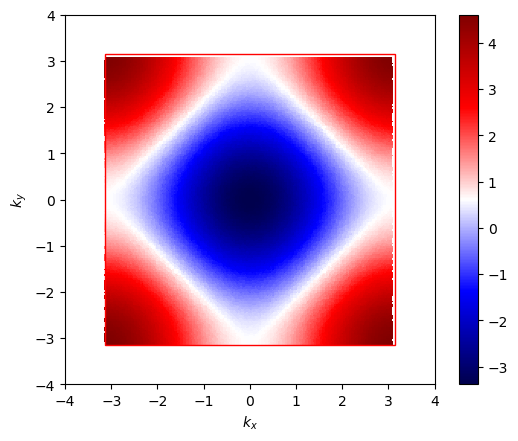

In [214]:
fig,ax=plt.subplots()
im=ax.tripcolor(hb.k_space[:,0],hb.k_space[:,1],en[1,:],cmap='seismic',)
# im=ax.tripcolor(hb.k_space[:,0],hb.k_space[:,1],en[0,:],cmap='seismic',)
# ax.scatter(hb.k_space[:,0],hb.k_space[:,1],occupancy[0,:],color='y',alpha=0.5)

# im=ax.tripcolor(hb.k_space[:,0],hb.k_space[:,1],en[1,:],cmap='seismic',vmin=-3,vmax=5)
# ax.scatter(hb.k_space[:,0],hb.k_space[:,1],occupancy[1,:],color='y',alpha=0.5)

plt.colorbar(im)

ax.set_aspect('equal')

rect = patches.Rectangle((-np.pi, -np.pi), 2*np.pi, 2*np.pi, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')


# get_exp_val

In [215]:
import numpy as np

class HubbardHartreeFock:
    def __init__(self, t, U, N):
        """
        Initializes the Hubbard model parameters for Hartree-Fock calculations.

        Parameters:
        - t (float): Hopping parameter.
        - U (float): On-site interaction strength.
        - N (int): Number of k-points in each direction of the 2D lattice.
        """
        self.t = t  # Hopping parameter
        self.U = U  # On-site interaction strength
        self.N = N  # Number of k-points in each direction
        self.k_space = self.generate_k_space()  # Generating the k-space
        self.H0 = self.generate_noninteracting()
        # Placeholder for H0 initialization
        # Placeholder for exp_val initialization

    def generate_k_space(self):
        """
        Generates the mesh grid of k points in the first Brillouin zone.

        Returns:
        - numpy.ndarray: A 2D array with shape (N^2, 2), where the first column
                         is the kx component and the second column is the ky component.
        """
        k_values = np.linspace(-np.pi, np.pi, self.N, endpoint=False)
        kx, ky = np.meshgrid(k_values, k_values)
        k_space = np.vstack([kx.flatten(), ky.flatten()]).T
        return k_space

    def generate_noninteracting(self):
        """
        Constructs the noninteracting term for the Hamiltonian.

        Returns:
        - numpy.ndarray: A 3D array with shape (2, 2, N^2), where the first two axes
                         represent the spin components, and the third axis represents
                         different k points.
        """
        # Initializing the array
        noninteracting_matrix = np.zeros((2, 2, self.N**2))

        # Calculating epsilon_k for each k point
        epsilon_k = -2 * self.t * (np.cos(self.k_space[:, 0]) + np.cos(self.k_space[:, 1]))

        # Filling in the diagonal for both spin up and down
        noninteracting_matrix[0, 0, :] = epsilon_k  # Spin up diagonal
        noninteracting_matrix[1, 1, :] = epsilon_k  # Spin down diagonal

        return noninteracting_matrix

    def generate_H_int(self, exp_val):
        """
        Constructs the interacting term after Hartree-Fock decomposition.

        Parameters:
        - exp_val (numpy.ndarray): Expected values with shape (2, N^2), where the first index
                                   represents spin up and down, and the second index represents
                                   different k points.

        Returns:
        - numpy.ndarray: A 3D array with shape (2, 2, N^2), representing the interacting term.
        """
        # Initializing the interacting term matrix
        H_int_matrix = np.zeros((2, 2, self.N**2))
        
        # Calculating the interacting term for both spin components
        # Note: The sum over k' is accounted for by averaging the expectation values (exp_val)
        avg_exp_val_up = np.mean(exp_val[0, :])  # Average for spin up
        avg_exp_val_down = np.mean(exp_val[1, :])  # Average for spin down
        
        # Filling the diagonal terms according to the Hartree-Fock approximation
        H_int_matrix[0, 0, :] = self.U * avg_exp_val_down  # For spin up electrons
        H_int_matrix[1, 1, :] = self.U * avg_exp_val_up  # For spin down electrons

        return H_int_matrix

    def get_occupancy(self, en, nu):
        """
        Calculates the occupancy of each state at each k point.

        Parameters:
        - en (numpy.ndarray): The energies with shape (2, N^2), where the first index is the level index
                              (spin up and spin down), and the second index is for different k points.
        - nu (float): The filling factor, determining the proportion of occupied states.

        Returns:
        - numpy.ndarray: The occupancy with shape (2, N^2), where the first index is the level index
                         (spin up and spin down), and the second index is for different k points.
        """
        # Flatten the energy array to find the universal Fermi level
        flattened_en = en.flatten()

        # Sort the flattened energy array to find the Fermi level based on filling factor
        sorted_en = np.sort(flattened_en)
        
        # Determine the index for the Fermi level based on the filling factor
        fermi_index = int(np.floor(nu * len(sorted_en)))
        
        # Fermi energy is the energy at the Fermi index
        fermi_energy = sorted_en[fermi_index]

        # Compute occupancy: 1 if energy <= Fermi level, 0 otherwise
        occupancy = np.where(en <= fermi_energy, 1, 0)

        return occupancy

    def compute_exp_val(self, wf, occupancy):
        """
        Computes the expected value <c_k,s^dagger c_k,s> using the wavefunction and occupancy.

        Parameters:
        - wf (numpy.ndarray): Wavefunction with shape (2, 2, N^2), where the first index is for spin (up/down),
                              the second index is the level index, and the third index is for different k points.
        - occupancy (numpy.ndarray): Occupancy of each state at each k point, with shape (2, N^2),
                                     where the first index is the level index, and the second index is for different k points.

        Returns:
        - numpy.ndarray: The expected value with shape (2, N^2), where the first index is for spin (up/down),
                         and the second index is for different k points.
        """
        # Compute the expected value using tensor contraction with np.einsum
        exp_val = np.einsum('slk,lk,slk->sk', wf, occupancy, np.conj(wf))
        return exp_val



    def generate_total(self, H_int):
        """
        Computes the total Hamiltonian as the sum of the noninteracting and interacting terms.

        Parameters:
        - H_int (numpy.ndarray): The interacting term with shape (2, 2, N^2), where the first two indices
                                 are for spin up and spin down, and the third axis is for different k points.

        Returns:
        - numpy.ndarray: The total Hamiltonian with the same shape (2, 2, N^2).
        """
        # Summing the noninteracting term H0 and the interacting term H_int
        H_total = self.H0 + H_int
        return H_total

    def diagonalize(self, H_total):
        """
        Diagonalizes the total Hamiltonian for each k point, sorts the eigenvalues and eigenvectors.

        Parameters:
        - H_total (numpy.ndarray): The total Hamiltonian with shape (2, 2, N^2).

        Returns:
        - numpy.ndarray: Eigenvectors (wavefunctions) with shape (2, 2, N^2).
        - numpy.ndarray: Eigenvalues (energies) with shape (2, N^2).
        """
        N2 = self.N**2
        wf = np.zeros((2, 2, N2), dtype=np.complex128)  # Wavefunctions (eigenvectors)
        en = np.zeros((2, N2))  # Eigenvalues (energies)

        # Ensure H_total is Hermitian by symmetrizing it
        H_total_sym = (H_total + np.conjugate(np.swapaxes(H_total, 0, 1))) / 2

        # Loop over each k point
        for i in range(N2):
            # Diagonalize the 2x2 Hamiltonian for this k point
            vals, vecs = np.linalg.eigh(H_total_sym[:, :, i])

            # Sort eigenvalues and eigenvectors
            sort_index = np.argsort(vals)
            vals_sorted = vals[sort_index]
            vecs_sorted = vecs[:, sort_index]

            # Store the sorted eigenvalues and eigenvectors
            en[:, i] = vals_sorted
            wf[:, :, i] = vecs_sorted

        return wf, en

    def get_energy(self, exp_val):
        """
        Computes the wavefunction and eigenvalues from the expected value.

        Parameters:
        - exp_val (numpy.ndarray): Expected values with shape (2, N^2), for spin up and down, and different k points.

        Returns:
        - numpy.ndarray: Wavefunctions with shape (2, 2, N^2).
        - numpy.ndarray: Eigenvalues with shape (2, N^2).
        """
        # Step 1: Compute the interacting term H_int from exp_val
        H_int = self.generate_H_int(exp_val)

        # Step 2: Compute the total Hamiltonian H_total from H_int and H0
        H_total = self.generate_total(H_int)

        # Step 3: Diagonalize H_total to get wavefunctions and energies
        wf, en = self.diagonalize(H_total)

        return wf, en

    def get_exp_val(self, wf, en, nu):
        """
        Computes the expected values from the wavefunction, eigenenergies, and filling factor.

        Parameters:
        - wf (numpy.ndarray): Wavefunctions with shape (2, 2, N^2).
        - en (numpy.ndarray): Eigenenergies with shape (2, N^2).
        - nu (float): Filling factor.

        Returns:
        - numpy.ndarray: Expected values with shape (2, N^2).
        """
        # Compute the occupancy based on energies and filling factor
        occ = self.get_occupancy(en, nu)

        # Compute the expected value from wavefunction and occupancy
        exp_val = self.compute_exp_val(wf, occ)

        return exp_val


In [216]:
hb=HubbardHartreeFock(1,1,100)
ek=hb.generate_noninteracting()
en=np.vstack([ek[0,0,:],ek[1,1,:]+1])
occupancy=hb.get_occupancy(en,0.5)
wf=np.repeat(np.array([[1,0.],[0.,1]])[:,:,np.newaxis],hb.N**2,axis=-1)
exp_val=hb.compute_exp_val(wf,occupancy)
wf,en=hb.get_energy(exp_val)
exp_val=hb.get_exp_val(wf,en,0.5)

In [217]:
exp_val

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

Text(0, 0.5, '$k_y$')

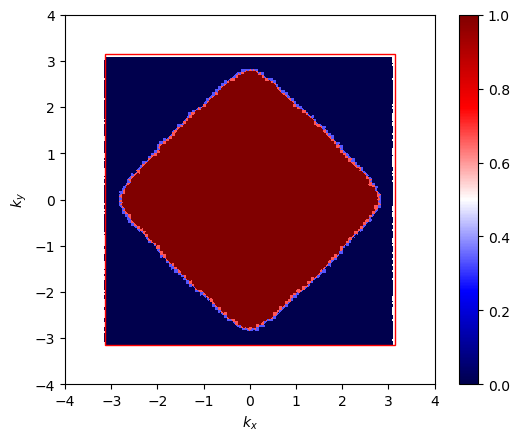

In [222]:
fig,ax=plt.subplots()
im=ax.tripcolor(hb.k_space[:,0],hb.k_space[:,1],exp_val[1,:].real,cmap='seismic',)
# ax.scatter(hb.k_space[:,0],hb.k_space[:,1],occupancy[0,:],color='y',alpha=0.5)

# im=ax.tripcolor(hb.k_space[:,0],hb.k_space[:,1],en[1,:],cmap='seismic',vmin=-3,vmax=5)
# ax.scatter(hb.k_space[:,0],hb.k_space[:,1],occupancy[1,:],color='y',alpha=0.5)

plt.colorbar(im)

ax.set_aspect('equal')

rect = patches.Rectangle((-np.pi, -np.pi), 2*np.pi, 2*np.pi, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')


# solve

In [31]:
import numpy as np

class HubbardHartreeFock:
    def __init__(self, t, U, N):
        """
        Initializes the Hubbard model parameters for Hartree-Fock calculations.

        Parameters:
        - t (float): Hopping parameter.
        - U (float): On-site interaction strength.
        - N (int): Number of k-points in each direction of the 2D lattice.
        """
        self.t = t  # Hopping parameter
        self.U = U  # On-site interaction strength
        self.N = N  # Number of k-points in each direction
        self.k_space = self.generate_k_space()  # Generating the k-space
        self.H0 = self.generate_noninteracting()
        # Placeholder for H0 initialization
        # Placeholder for exp_val initialization

    def generate_k_space(self):
        """
        Generates the mesh grid of k points in the first Brillouin zone.

        Returns:
        - numpy.ndarray: A 2D array with shape (N^2, 2), where the first column
                         is the kx component and the second column is the ky component.
        """
        k_values = np.linspace(-np.pi, np.pi, self.N, endpoint=False)
        kx, ky = np.meshgrid(k_values, k_values)
        k_space = np.vstack([kx.flatten(), ky.flatten()]).T
        return k_space

    def generate_noninteracting(self):
        """
        Constructs the noninteracting term for the Hamiltonian.

        Returns:
        - numpy.ndarray: A 3D array with shape (2, 2, N^2), where the first two axes
                         represent the spin components, and the third axis represents
                         different k points.
        """
        # Initializing the array
        noninteracting_matrix = np.zeros((2, 2, self.N**2))

        # Calculating epsilon_k for each k point
        epsilon_k = -2 * self.t * (np.cos(self.k_space[:, 0]) + np.cos(self.k_space[:, 1]))

        # Filling in the diagonal for both spin up and down
        noninteracting_matrix[0, 0, :] = epsilon_k  # Spin up diagonal
        noninteracting_matrix[1, 1, :] = epsilon_k  # Spin down diagonal

        return noninteracting_matrix

    def generate_H_int(self, exp_val):
        """
        Constructs the interacting term after Hartree-Fock decomposition.

        Parameters:
        - exp_val (numpy.ndarray): Expected values with shape (2, N^2), where the first index
                                   represents spin up and down, and the second index represents
                                   different k points.

        Returns:
        - numpy.ndarray: A 3D array with shape (2, 2, N^2), representing the interacting term.
        """
        # Initializing the interacting term matrix
        H_int_matrix = np.zeros((2, 2, self.N**2), dtype=np.complex128)
        
        # Calculating the interacting term for both spin components
        # Note: The sum over k' is accounted for by averaging the expectation values (exp_val)
        avg_exp_val_up = np.mean(exp_val[0, :])  # Average for spin up
        avg_exp_val_down = np.mean(exp_val[1, :])  # Average for spin down
        
        # Filling the diagonal terms according to the Hartree-Fock approximation
        H_int_matrix[0, 0, :] = self.U * avg_exp_val_down  # For spin up electrons
        H_int_matrix[1, 1, :] = self.U * avg_exp_val_up  # For spin down electrons

        return H_int_matrix

    def get_occupancy(self, en, nu):
        """
        Calculates the occupancy of each state at each k point.

        Parameters:
        - en (numpy.ndarray): The energies with shape (2, N^2), where the first index is the level index
                              (spin up and spin down), and the second index is for different k points.
        - nu (float): The filling factor, determining the proportion of occupied states.

        Returns:
        - numpy.ndarray: The occupancy with shape (2, N^2), where the first index is the level index
                         (spin up and spin down), and the second index is for different k points.
        """
        # Flatten the energy array to find the universal Fermi level
        flattened_en = en.flatten()

        # Sort the flattened energy array to find the Fermi level based on filling factor
        sorted_en = np.sort(flattened_en)
        
        # Determine the index for the Fermi level based on the filling factor
        fermi_index = int(np.floor(nu * len(sorted_en)))
        
        # Fermi energy is the energy at the Fermi index
        fermi_energy = sorted_en[fermi_index]

        # Compute occupancy: 1 if energy <= Fermi level, 0 otherwise
        occupancy = np.where(en <= fermi_energy, 1, 0)

        return occupancy

    def compute_exp_val(self, wf, occupancy):
        """
        Computes the expected value <c_k,s^dagger c_k,s> using the wavefunction and occupancy.

        Parameters:
        - wf (numpy.ndarray): Wavefunction with shape (2, 2, N^2), where the first index is for spin (up/down),
                              the second index is the level index, and the third index is for different k points.
        - occupancy (numpy.ndarray): Occupancy of each state at each k point, with shape (2, N^2),
                                     where the first index is the level index, and the second index is for different k points.

        Returns:
        - numpy.ndarray: The expected value with shape (2, N^2), where the first index is for spin (up/down),
                         and the second index is for different k points.
        """
        # Compute the expected value using tensor contraction with np.einsum
        exp_val = np.einsum('slk,lk,slk->sk', wf, occupancy, np.conj(wf))
        return exp_val



    def generate_total(self, H_int):
        """
        Computes the total Hamiltonian as the sum of the noninteracting and interacting terms.

        Parameters:
        - H_int (numpy.ndarray): The interacting term with shape (2, 2, N^2), where the first two indices
                                 are for spin up and spin down, and the third axis is for different k points.

        Returns:
        - numpy.ndarray: The total Hamiltonian with the same shape (2, 2, N^2).
        """
        # Summing the noninteracting term H0 and the interacting term H_int
        H_total = self.H0 + H_int
        return H_total

    def diagonalize(self, H_total):
        """
        Diagonalizes the total Hamiltonian for each k point, sorts the eigenvalues and eigenvectors.

        Parameters:
        - H_total (numpy.ndarray): The total Hamiltonian with shape (2, 2, N^2).

        Returns:
        - numpy.ndarray: Eigenvectors (wavefunctions) with shape (2, 2, N^2).
        - numpy.ndarray: Eigenvalues (energies) with shape (2, N^2).
        """
        N2 = self.N**2
        wf = np.zeros((2, 2, N2), dtype=np.complex128)  # Wavefunctions (eigenvectors)
        en = np.zeros((2, N2))  # Eigenvalues (energies)

        # Ensure H_total is Hermitian by symmetrizing it
        H_total_sym = (H_total + np.conjugate(np.swapaxes(H_total, 0, 1))) / 2

        # Loop over each k point
        for i in range(N2):
            # Diagonalize the 2x2 Hamiltonian for this k point
            vals, vecs = np.linalg.eigh(H_total_sym[:, :, i])

            # Sort eigenvalues and eigenvectors
            sort_index = np.argsort(vals)
            vals_sorted = vals[sort_index]
            vecs_sorted = vecs[:, sort_index]

            # Store the sorted eigenvalues and eigenvectors
            en[:, i] = vals_sorted
            wf[:, :, i] = vecs_sorted

        return wf, en

    def get_energy(self, exp_val):
        """
        Computes the wavefunction and eigenvalues from the expected value.

        Parameters:
        - exp_val (numpy.ndarray): Expected values with shape (2, N^2), for spin up and down, and different k points.

        Returns:
        - numpy.ndarray: Wavefunctions with shape (2, 2, N^2).
        - numpy.ndarray: Eigenvalues with shape (2, N^2).
        """
        # Step 1: Compute the interacting term H_int from exp_val
        H_int = self.generate_H_int(exp_val)

        # Step 2: Compute the total Hamiltonian H_total from H_int and H0
        H_total = self.generate_total(H_int)

        # Step 3: Diagonalize H_total to get wavefunctions and energies
        wf, en = self.diagonalize(H_total)

        return wf, en

    def get_exp_val(self, wf, en, nu):
        """
        Computes the expected values from the wavefunction, eigenenergies, and filling factor.

        Parameters:
        - wf (numpy.ndarray): Wavefunctions with shape (2, 2, N^2).
        - en (numpy.ndarray): Eigenenergies with shape (2, N^2).
        - nu (float): Filling factor.

        Returns:
        - numpy.ndarray: Expected values with shape (2, N^2).
        """
        # Compute the occupancy based on energies and filling factor
        occ = self.get_occupancy(en, nu)

        # Compute the expected value from wavefunction and occupancy
        exp_val = self.compute_exp_val(wf, occ)

        return exp_val

    def solve(self, exp_val_0, nu):
        """
        Self-consistently solves the Hubbard model using Hartree-Fock approximation.

        Parameters:
        - exp_val_0 (numpy.ndarray): Initial ansatz for the expected value, shape (2, N^2).
        - nu (float): Filling factor.

        Returns:
        - numpy.ndarray: Final wavefunction, shape (2, 2, N^2).
        - numpy.ndarray: Final eigenvalues (energies), shape (2, N^2).
        - numpy.ndarray: Final expected values, shape (2, N^2).
        """
        # Initialize the expected value with the initial ansatz
        exp_val = exp_val_0

        for iteration in range(100):  # Loop for a fixed number of iterations
            # Step 1: Get energy and wavefunction from the current expected value
            wf, en = self.get_energy(exp_val)

            # Step 2: Update the expected value from the new wavefunction, energies, and filling factor
            new_exp_val = self.get_exp_val(wf, en, nu)

            # Check for convergence (optional improvement could involve setting a tolerance)
            if np.allclose(new_exp_val, exp_val, atol=1e-10):
                print(f"Convergence reached at iteration {iteration}")
                break

            # Update the expected value for the next iteration
            exp_val = new_exp_val

        # Return the final wavefunction, energies, and expected values
        return wf, en, exp_val



#### Caveat: change the initalization of H_int to dtype=np.complex128 

In [32]:
import matplotlib.pyplot as plt

In [8]:
hb=HubbardHartreeFock(1,1,100)
ek=hb.generate_noninteracting()
en=np.vstack([ek[0,0,:],ek[1,1,:]+1])
occupancy=hb.get_occupancy(en,0.5)
wf=np.repeat(np.array([[1,0.],[0.,1]])[:,:,np.newaxis],hb.N**2,axis=-1)
exp_val=hb.compute_exp_val(wf,occupancy)
wf,en,exp_val=hb.solve(exp_val,0.5)

Convergence reached at iteration 4


In [ ]:
fig,ax=plt.subplots()
im=ax.tripcolor(hb.k_space[:,0],hb.k_space[:,1],exp_val[0,:].real,cmap='seismic',)
# ax.scatter(hb.k_space[:,0],hb.k_space[:,1],occupancy[0,:],color='y',alpha=0.5)

# im=ax.tripcolor(hb.k_space[:,0],hb.k_space[:,1],en[1,:],cmap='seismic',vmin=-3,vmax=5)
# ax.scatter(hb.k_space[:,0],hb.k_space[:,1],occupancy[1,:],color='y',alpha=0.5)

plt.colorbar(im)

ax.set_aspect('equal')

rect = patches.Rectangle((-np.pi, -np.pi), 2*np.pi, 2*np.pi, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')


In [63]:
def get_polarization(U,nu=0.5):
    hb=HubbardHartreeFock(1,U,100)
    ek=hb.generate_noninteracting()
    en=np.vstack([ek[0,0,:],ek[1,1,:]+1])
    occupancy=hb.get_occupancy(en,nu)
    wf=np.repeat(np.array([[1,0.],[0.,1]])[:,:,np.newaxis],hb.N**2,axis=-1)
    exp_val=hb.compute_exp_val(wf,occupancy)
    wf,en,exp_val=hb.solve(exp_val,nu)
    return np.mean(exp_val[0,:].real)-np.mean(exp_val[1,:].real)

In [11]:
get_polarization(0.1)

Convergence reached at iteration 2


0.010050000000000059

In [64]:
U_list=np.linspace(0,10,21)
polarization_list=[get_polarization(U) for U in U_list]

Convergence reached at iteration 1
Convergence reached at iteration 3
Convergence reached at iteration 4
Convergence reached at iteration 6
Convergence reached at iteration 6
Convergence reached at iteration 9
Convergence reached at iteration 16
Convergence reached at iteration 12
Convergence reached at iteration 11
Convergence reached at iteration 4
Convergence reached at iteration 13
Convergence reached at iteration 12
Convergence reached at iteration 14
Convergence reached at iteration 17
Convergence reached at iteration 14
Convergence reached at iteration 16
Convergence reached at iteration 17
Convergence reached at iteration 7
Convergence reached at iteration 5
Convergence reached at iteration 5
Convergence reached at iteration 4


Text(0, 0.5, '$S_z$')

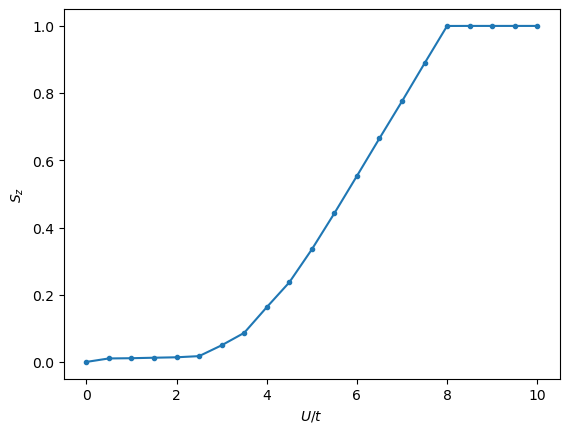

In [13]:
fig,ax=plt.subplots()
ax.plot(U_list,polarization_list,'.-')
ax.set_xlabel(r'$U/t$')
ax.set_ylabel(r'$S_z$')

Text(0, 0.5, '$S_z$')

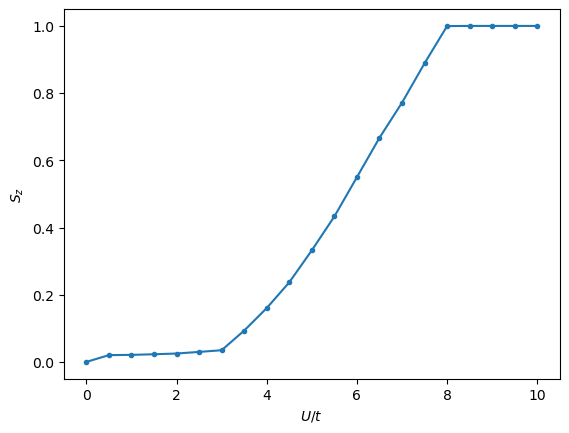

In [65]:
fig,ax=plt.subplots()
ax.plot(U_list,polarization_list,'.-')
ax.set_xlabel(r'$U/t$')
ax.set_ylabel(r'$S_z$')

In [77]:
U_list=np.linspace(0,10,21)
nu_list=np.linspace(0.1,0.9,21)
polarization_map=np.zeros((len(U_list),len(nu_list)))
for i,U in enumerate(U_list):
    for j,nu in enumerate(nu_list):
        polarization_map[i,j]=get_polarization(U,nu)

# =[get_polarization(U) for U in U_list]

Convergence reached at iteration 1
Convergence reached at iteration 1
Convergence reached at iteration 1
Convergence reached at iteration 1
Convergence reached at iteration 1
Convergence reached at iteration 1
Convergence reached at iteration 1
Convergence reached at iteration 1
Convergence reached at iteration 1
Convergence reached at iteration 1
Convergence reached at iteration 1
Convergence reached at iteration 1
Convergence reached at iteration 1
Convergence reached at iteration 1
Convergence reached at iteration 1
Convergence reached at iteration 1
Convergence reached at iteration 1
Convergence reached at iteration 1
Convergence reached at iteration 1
Convergence reached at iteration 1
Convergence reached at iteration 1
Convergence reached at iteration 2
Convergence reached at iteration 2
Convergence reached at iteration 2
Convergence reached at iteration 3
Convergence reached at iteration 2
Convergence reached at iteration 2
Convergence reached at iteration 3
Convergence reached 

/tmp/ipykernel_50351/521127556.py:7: RuntimeWarning: divide by zero encountered in divide
  ax.plot(nu_list2,1/dos,color='k')


(0.0, 10.0)

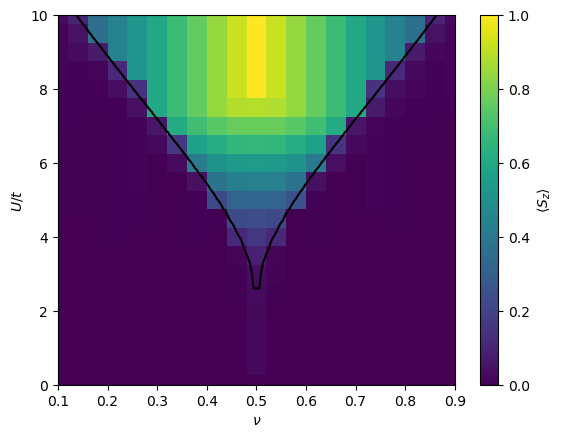

In [79]:
fig,ax=plt.subplots()
im=ax.pcolormesh(nu_list,U_list,polarization_map,vmin=0,vmax=1)
plt.colorbar(im,label=r'$\langle S_z\rangle$')
ax.set_xlabel(r'$\nu$')
ax.set_ylabel(r'$U/t$')

ax.plot(nu_list2,1/dos,color='k')
ax.set_xlim([.1,.9])
ax.set_ylim([0,10])

In [20]:
Please find the 'phase diagram' starting with a FM ansatz in a 2D square lattice with N_x = N_y = 100. The exist criterion is when the update of the norm of the expected value is less than 10^-5. (this is ensured to be a small enough value that does not affect the phase diagram qualitatively)


SyntaxError: invalid syntax (517405824.py, line 1)

In [185]:
H_total.shape

(2, 2, 10000)

In [152]:
wf.shape

(2, 2, 100)

In [153]:
en.shape

(2, 100)

In [154]:
ek.shape

(2, 2, 100)

In [168]:
hb.compute_exp_val(wf,en,0.5)

TypeError: HubbardHartreeFock.compute_exp_val() takes 3 positional arguments but 4 were given

In [125]:
hb.compute_exp_val(wf,en,0.5)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 1.01, 1.01, 1.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1.01, 1.01, 1.01, 1.01, 1.01, 0.  , 0.  , 0.  , 0.  , 1.01,
        1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 0.  , 0.  , 1.01, 1.01, 1.01,
        1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 0.  , 1.01, 1.01, 1.01, 1.01,
        1.01, 1.01, 1.01, 1.01, 1.01, 0.  , 1.01, 1.01, 1.01, 1.01, 1.01,
        1.01, 1.01, 1.01, 1.01, 0.  , 0.  , 1.01, 1.01, 1.01, 1.01, 1.01,
        1.01, 1.01, 0.  , 0.  , 0.  , 0.  , 1.01, 1.01, 1.01, 1.01, 1.01,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.01, 1.01, 1.01, 0.  , 0.  ,
        0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 1.04, 1.04, 1.04, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1.04, 1.04, 1.04, 1.04, 1.04, 0.  , 0.  , 0.  , 0.  , 1.04,
        1.04, 1.04, 1.04, 1.04, 1.04, 1.04, 0.  , 0.  , 1.04, 1.04, 1.04,
        1.04, 1.04, 1.0

In [172]:
hb.compute_exp_val(wf,occupancy)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 1.01, 1.01, 1.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1.01, 1.01, 1.01, 1.01, 1.01, 0.  , 0.  , 0.  , 0.  , 1.01,
        1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 0.  , 0.  , 1.01, 1.01, 1.01,
        1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 0.  , 1.01, 1.01, 1.01, 1.01,
        1.01, 1.01, 1.01, 1.01, 1.01, 0.  , 1.01, 1.01, 1.01, 1.01, 1.01,
        1.01, 1.01, 1.01, 1.01, 0.  , 0.  , 1.01, 1.01, 1.01, 1.01, 1.01,
        1.01, 1.01, 0.  , 0.  , 0.  , 0.  , 1.01, 1.01, 1.01, 1.01, 1.01,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.01, 1.01, 1.01, 0.  , 0.  ,
        0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.04, 0.04, 0.04, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.04, 0.04, 0.04, 0.04, 0.04, 0.  , 0.  , 0.  , 0.  , 0.04,
        0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.  , 0.  , 0.04, 0.04, 0.04,
        0.04, 0.04, 0.0

In [82]:
ek[0,1,:]

array([0., 0., 0., ..., 0., 0., 0.])

# Analytic

In [8]:
import matplotlib.pyplot as plt

In [2]:
import gftool as gt

In [4]:
import numpy as np

In [30]:
eps = np.linspace(-4.1, 4.1, num=500)

In [24]:
dos = gt.lattice.square.dos(eps, half_bandwidth=4)

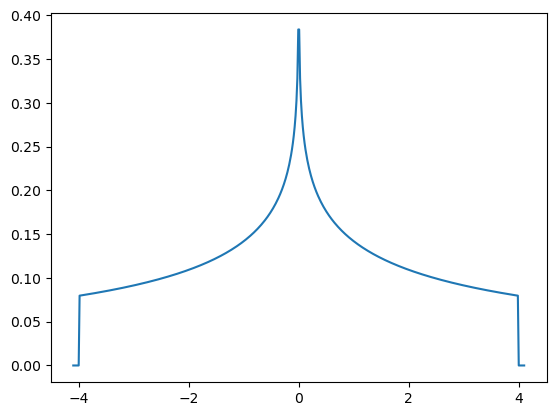

In [25]:
plt.plot(eps,dos)

In [20]:
gt.lattice.square.dos(0,half_bandwidth=2)

array(inf)

/tmp/ipykernel_50351/2317411758.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(eps,4/dos)


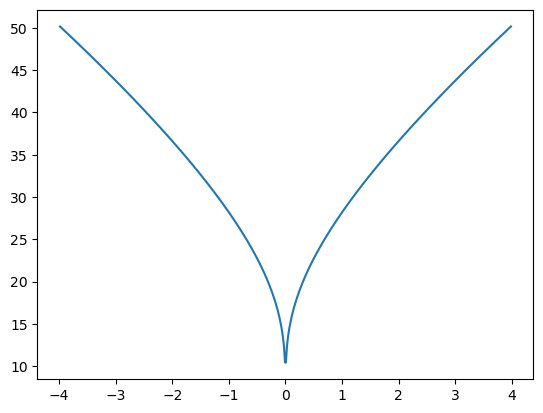

In [26]:
plt.plot(eps,4/dos)

In [ ]:
def E

In [55]:
hb=HubbardHartreeFock(1,1,200)
ek=hb.generate_noninteracting()

In [71]:
nu_list2=[(np.sort(ek[0,0,:])<e).mean() for e in eps]

/tmp/ipykernel_50351/3268716330.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(nu_list2,1/dos)


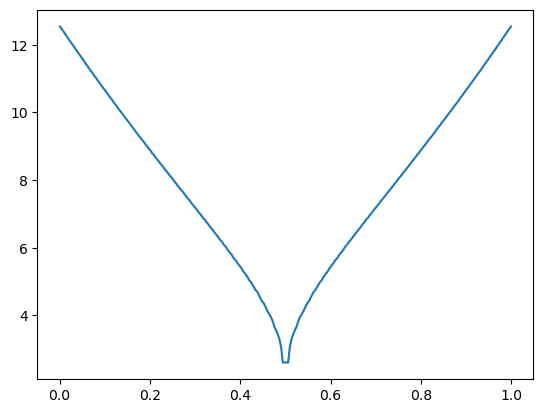

In [72]:
plt.plot(nu_list2,1/dos)

In [57]:
nu

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.001125,
 0.002425,
 0.003625,
 0.005325,
 0.006525,
 0.007625,
 0.008925,
 0.010525,
 0.012025,
 0.012925,
 0.014425,
 0.015825,
 0.016825,
 0.018725,
 0.019825,
 0.021125,
 0.022125,
 0.023925,
 0.025125,
 0.026825,
 0.027725,
 0.029625,
 0.030625,
 0.032225,
 0.033625,
 0.034925,
 0.036025,
 0.037225,
 0.039125,
 0.040125,
 0.041925,
 0.043325,
 0.044525,
 0.045925,
 0.047325,
 0.048825,
 0.050425,
 0.051525,
 0.053025,
 0.054425,
 0.055825,
 0.057325,
 0.058825,
 0.059825,
 0.061925,
 0.063125,
 0.064225,
 0.065925,
 0.067525,
 0.068525,
 0.070225,
 0.071925,
 0.073125,
 0.074825,
 0.076425,
 0.077525,
 0.079225,
 0.080625,
 0.082425,
 0.083525,
 0.085225,
 0.087025,
 0.087825,
 0.089925,
 0.091325,
 0.092325,
 0.094525,
 0.095725,
 0.097325,
 0.098825,
 0.100425,
 0.102125,
 0.103325,
 0.105225,
 0.107025,
 0.108225,
 0.109625,
 0.111425,
 0.113025,
 0.114625,
 0.116325,
 0.117525,
 0.119225,
 0.120625,
 0.122125,
 0.124325,
 0.125925,
 

In [ ]:
gt.chemical_potential()